## Objetivos
- Obetener un modelo que arroje el precio de una propiedad en función de ciertas características.

## Importación de librerías

In [1]:
import pandas as pd ## para importar el dataset y poder analizar el mismo
import matplotlib.pyplot as plt ## para graficos de estadistica
import seaborn as sns ## para graficos de estadistica
import numpy as np ## para trabajar con matrices

## Lectura del dataset

In [2]:
url = "https://github.com/caro6852lq/MachineLearning_PredictPricesProperties/raw/refs/heads/main/Data/Dataset_Inmuebles.xlsx"

In [3]:
!pip install openpyxl


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
df1 = pd.read_excel(url, sheet_name=0)   # primera hoja
df2 = pd.read_excel(url, sheet_name=1)   # segunda hoja
df3 = pd.read_excel(url, sheet_name=2)   # tercera hoja

In [5]:
df1.head(2) # reviso que hay en cada hoja

,ID,property_type,lat,lon,description,title
0,5415,apartment,-346.115.808,-584.101.838,Departamento de 2 ambientes superficie total 5...,Venta Departamento 2 ambientes 52m2 cochera Ap...
1,1761,apartment,-345.904.453,-58.410.856.200.000.000,Piso de 4 ambientes con dependencia y balcón a...,Guemes y C.Díaz - Piso de 4 c/dependencia en v...


In [6]:
df2.head(2) # reviso que hay en cada hoja

,ID,price_usd,surface_total,surface_covered,floor,rooms,expenses
0,222,250.0k,150,140,NaN,6,NaN
1,4224,399.0k,164,155,NaN,4,NaN


In [7]:
df3.head(2) # reviso que hay en cada hoja

,ID,barrio,comuna
0,4630,NUÑEZ,13
1,10134,MATADEROS,9


In [8]:
df1df2 = df1.merge(df2, how = 'left', on='ID') # hago merge de las dos primeras hojas a través del ID

In [9]:
df1df2.head(3) # chequeo que quedó ok

,ID,property_type,lat,lon,description,title,price_usd,surface_total,surface_covered,floor,rooms,expenses
0,5415,apartment,-346.115.808,-584.101.838,Departamento de 2 ambientes superficie total 5...,Venta Departamento 2 ambientes 52m2 cochera Ap...,100.0k,52,44,NaN,2,NaN
1,1761,apartment,-345.904.453,-58.410.856.200.000.000,Piso de 4 ambientes con dependencia y balcón a...,Guemes y C.Díaz - Piso de 4 c/dependencia en v...,350.0k,111,104,NaN,4,5000.0
2,1826,apartment,-345.829.338.033,-584.219.018.513,Living comedor.Dormitorios 1 con placard. Coci...,Venta. Departamento 2 Ambientes. Guemes 4400. ...,93.5k,32,32,NaN,2,NaN


In [10]:
df = df1df2.merge(df3, how = 'left', on='ID') # agrego al merge la 3° hoja

In [11]:
df.head(2) # reviso que el df final quedó completo

,ID,property_type,lat,lon,description,title,price_usd,surface_total,surface_covered,floor,rooms,expenses,barrio,comuna
0,5415,apartment,-346.115.808,-584.101.838,Departamento de 2 ambientes superficie total 5...,Venta Departamento 2 ambientes 52m2 cochera Ap...,100.0k,52,44,NaN,2,NaN,BALVANERA,3
1,1761,apartment,-345.904.453,-58.410.856.200.000.000,Piso de 4 ambientes con dependencia y balcón a...,Guemes y C.Díaz - Piso de 4 c/dependencia en v...,350.0k,111,104,NaN,4,5000.0,PALERMO,14


In [12]:
df.shape #check de cantidad de columnas y registros

(10567, 14)

In [13]:
df.columns # check para saber si me quedo con el nombre de las columnas o las modifico


Index(['ID', 'property_type', 'lat', 'lon', 'description', 'title',
       'price_usd', 'surface_total', 'surface_covered', 'floor', 'rooms',
       'expenses', 'barrio', 'comuna'],
      dtype='object')

In [14]:
df.info() # check de tipo de dato por columnas
## Ajustar la columna de precio, latitud y longitud

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567 entries, 0 to 10566
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10567 non-null  int64  
 1   property_type    10079 non-null  object 
 2   lat              10567 non-null  object 
 3   lon              10567 non-null  object 
 4   description      10567 non-null  object 
 5   title            10567 non-null  object 
 6   price_usd        10567 non-null  object 
 7   surface_total    10567 non-null  int64  
 8   surface_covered  10567 non-null  int64  
 9   floor            1717 non-null   float64
 10  rooms            10567 non-null  int64  
 11  expenses         2535 non-null   float64
 12  barrio           10567 non-null  object 
 13  comuna           10567 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 1.1+ MB


In [15]:
df_0 = df

## Limpieza de Datos

In [16]:
## Ajusto la columna de precio
df["price_usd"] = (
    df["price_usd"]
      .str.replace("k", "", regex=True)   # quita k/K finales
      )
df["price_usd"] = df["price_usd"].astype("float64")
df["price_usd"] = df["price_usd"]*100

In [17]:
#Transformar Latitud a float64
# Primero, debes reemplazar los puntos incorrectos. Usaremos regex para transformar el formato.
df['lat'] = df['lat'].str.replace('.', '', regex=False)  # Eliminar todos los puntos
df['lat'] = df['lat'].apply(lambda x: x[:3] + '.' + x[3:]) #sumo el punto dp de los tres primeros valores
df['lat'] = df['lat'].astype('float64') # paso a float

In [18]:
#Transformar lonitud a float64
# Primero, debes reemplazar los puntos incorrectos. Usaremos regex para transformar el formato.
df['lon'] = df['lon'].str.replace('.', '', regex=False)  # Eliminar todos los puntos
df['lon'] = df['lon'].apply(lambda x: x[:3] + '.' + x[3:]) #sumo el punto dp de los tres primeros valores
df['lon'] = df['lon'].astype('float64') # paso a float

In [19]:
# Saber si hay nulos
df.isnull().sum()

ID                    0
property_type       488
lat                   0
lon                   0
description           0
title                 0
price_usd             0
surface_total         0
surface_covered       0
floor              8850
rooms                 0
expenses           8032
barrio                0
comuna                0
dtype: int64

## Analisis Exploratorio (previo modelo)

### Limpieza de Outliers Target

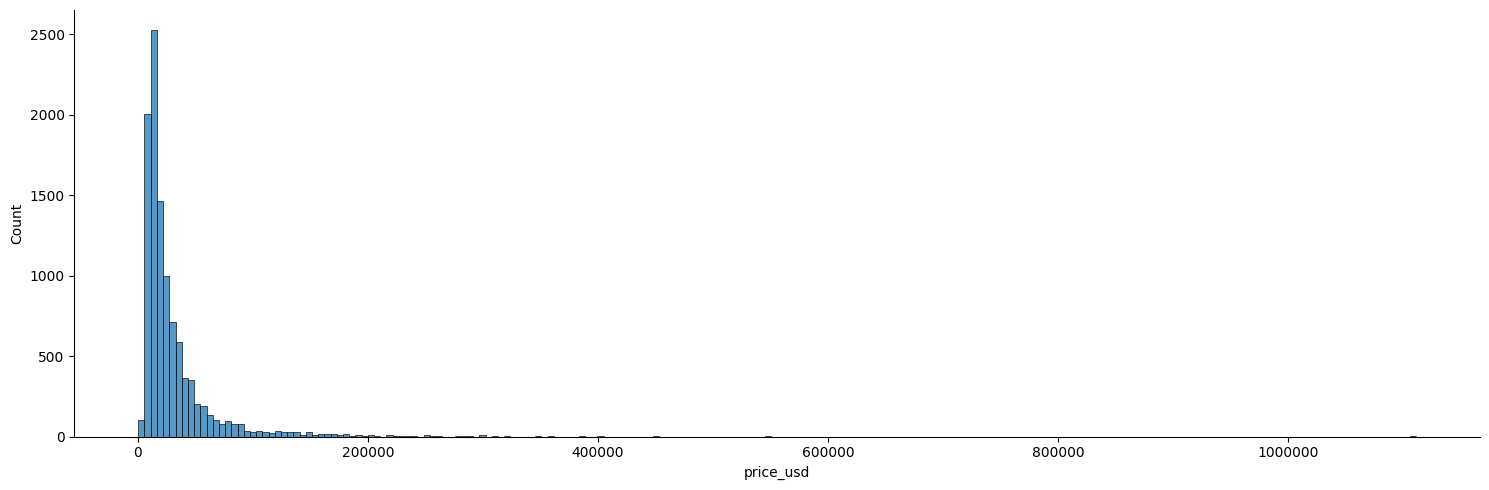

In [20]:
## Reviso la distribución de la variable a predecir
sns.displot(df["price_usd"], aspect=3)
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

In [21]:
pd.set_option('display.float_format', '{:,.2f}'.format)

df.price_usd.describe()

count      10,567.00
mean       30,432.62
std        37,126.58
min           504.30
25%        12,400.00
50%        18,900.00
75%        34,000.00
max     1,111,111.10
Name: price_usd, dtype: float64

##### Método DS

In [22]:
media = df["price_usd"].mean()
desv_std = df["price_usd"].std()
print(media, desv_std)

30432.62409387716 37126.580671302414


In [23]:
LI_DS = media - 3*desv_std
LS_DS =  media + 3*desv_std
print(LI_DS, LS_DS)

-80947.11792003008 141812.3661077844


In [24]:
# Filtramos los valores dentro del rango
df = df[(df["price_usd"] >= LI_DS) & (df["price_usd"] <= LS_DS)]
df.shape


(10343, 14)

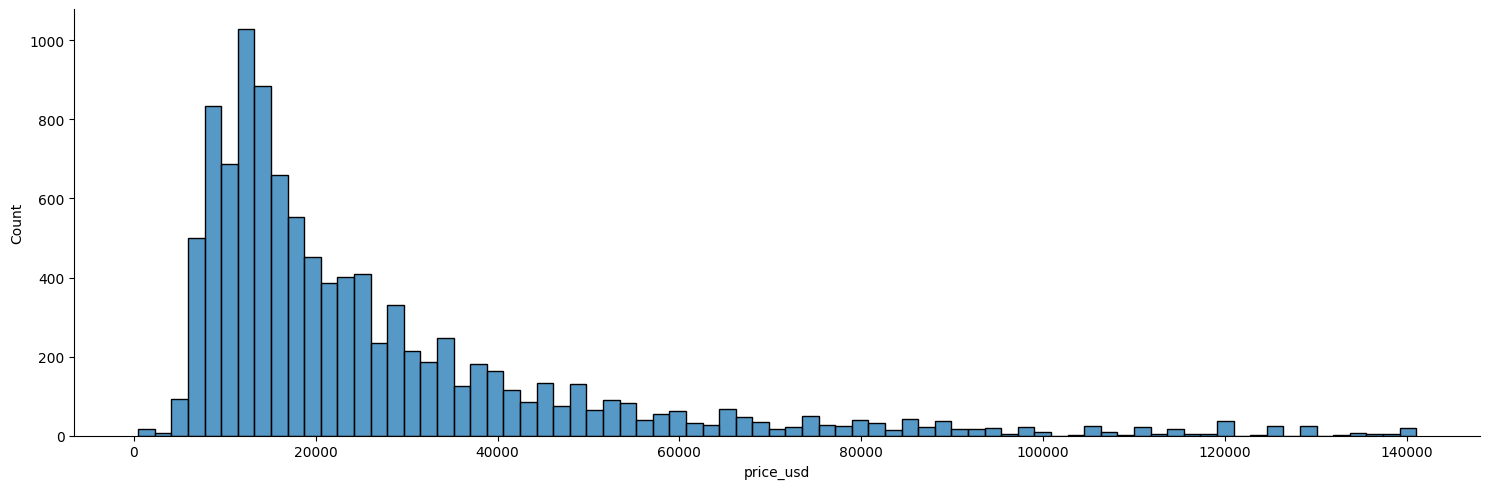

In [25]:
## Reviso el df_limpio
sns.displot(df["price_usd"], aspect=3)
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

### Limpieza de Outliers Variables

#### Variables Numéricas

##### Sup Total

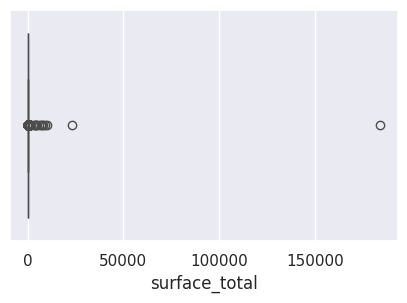

In [27]:
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(x=df["surface_total"])
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

In [28]:
df = df[df['surface_total'] < 184000]

In [29]:
## Superficie Total por DS

media = df["surface_total"].mean()
desv_std = df["surface_total"].std()

LI_DS = media - 3*desv_std
LS_DS =  media + 3*desv_std

Q_a_limpiar = (df[df['surface_total']>LS_DS]).shape

print(LI_DS, LS_DS, Q_a_limpiar )


-847.1418173918726 1065.9385685038433 (13, 14)


In [30]:
# Filtramos los valores dentro del rango para la superficie total
df = df[(df["surface_total"] >= LI_DS) & (df["surface_total"] <= LS_DS)]
df.shape


(10329, 14)

In [31]:
# Agrego un filtro arbitrario para valores bajos ya que no surgió por los métodos tradicionales
df = df[(df["surface_total"] >= 10)]
df.shape


(10321, 14)

##### Sup Cubierta

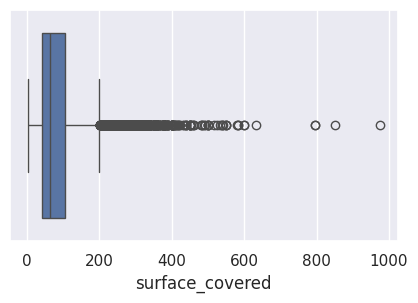

In [33]:
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(x=df["surface_covered"])
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

##### Lat y Lon

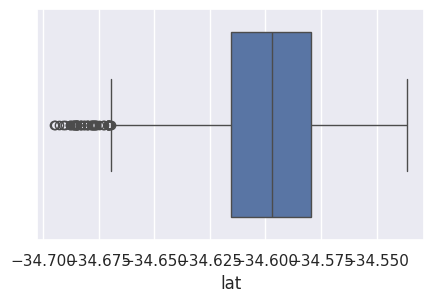

In [35]:
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(x=df["lat"])
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

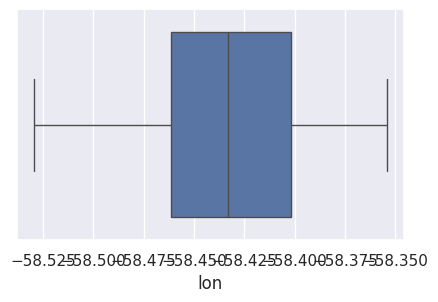

In [36]:
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(x=df["lon"])
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

##### Rooms

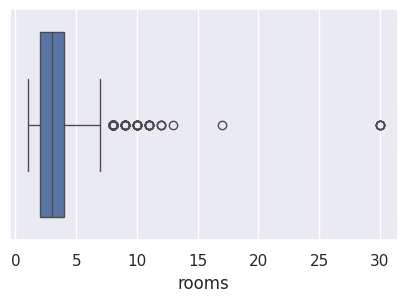

In [38]:
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(x=df["rooms"])
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

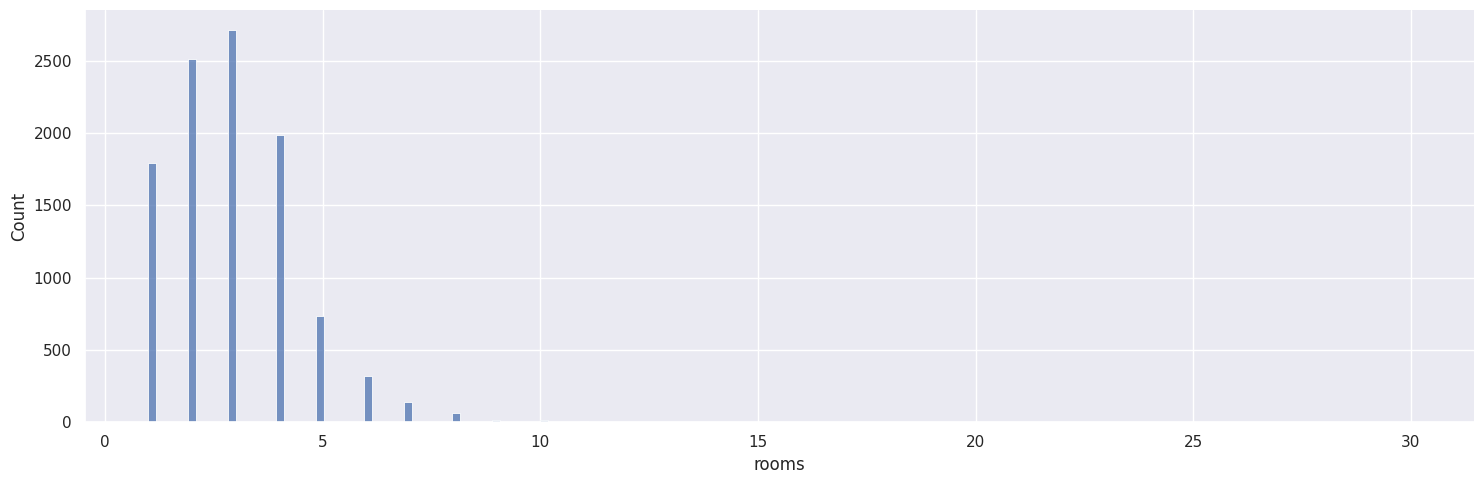

In [39]:
## Reviso el df_limpio
sns.displot(df["rooms"], aspect=3)
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

In [40]:
## En este caso tomo un modo arbitrario
# Filtramos los valores dentro del rango para la superficie total
df = df[(df["rooms"] < 17) ]

print('Registros en df limpio:', df.shape[0])
print('Registros en df original:', df_0.shape[0])
print('% Registros conservados;', df.shape[0]/df.shape[0])

Registros en df limpio: 10315
Registros en df original: 10567
% Registros conservados; 1.0


#### Variables Categóricas

In [41]:
##Para ver los valores que asume una dimensión
df["property_type"].unique()

array(['apartment', 'house', nan], dtype=object)

In [42]:
## Borro los registros "Sin Dato" para tipo de propiedad
df = df[df["property_type"] !='Sin Dato']

print('Registros en df limpio:', df.shape[0])
print('Registros en df original:', df_0.shape[0])
print('% Registros conservados;', df.shape[0]/df.shape[0])

Registros en df limpio: 10315
Registros en df original: 10567
% Registros conservados; 1.0


In [43]:
##Para ver los valores que asume una dimensión
df["rooms"].unique()

array([ 2,  4,  3,  1,  5,  9,  6,  7,  8, 10, 12, 11, 13])

In [44]:
##Para ver los valores que asume una dimensión
df["barrio"].unique()

array(['BALVANERA', 'PALERMO', 'ALMAGRO', 'BELGRANO', 'MONSERRAT',
       'PUERTO MADERO', 'CABALLITO', 'RECOLETA', 'SAN NICOLAS',
       'MATADEROS', 'FLORES', 'VILLA URQUIZA', 'PARQUE AVELLANEDA',
       'VERSALLES', 'NUÑEZ', 'VILLA SANTA RITA', 'MONTE CASTRO',
       'VILLA CRESPO', 'RETIRO', 'VILLA LURO', 'COLEGIALES', 'CHACARITA',
       'LINIERS', 'VILLA DEVOTO', 'FLORESTA', 'COGHLAN', 'AGRONOMIA',
       'NUEVA POMPEYA', 'PARQUE CHAS', 'CONSTITUCION', 'SAN CRISTOBAL',
       'BOCA', 'PARQUE PATRICIOS', 'VILLA PUEYRREDON', 'BOEDO',
       'VILLA GRAL. MITRE', 'PATERNAL', 'VILLA SOLDATI', 'BARRACAS',
       'SAN TELMO', 'VILLA DEL PARQUE', 'VILLA REAL', 'SAAVEDRA',
       'VELEZ SARSFIELD', 'VILLA ORTUZAR', 'PARQUE CHACABUCO',
       'VILLA LUGANO', 'VILLA RIACHUELO'], dtype=object)

In [45]:
##Para ver los valores que asume una dimensión
df["comuna"].unique()

array([ 3, 14,  5, 13,  1,  6,  2,  9,  7, 12, 10, 11, 15,  4,  8])

In [46]:
#Entender que tienen de diferente barrio y columna
df.groupby(['barrio', 'comuna']).size().sort_index(level=['comuna', 'barrio'])


barrio             comuna
CONSTITUCION       1          132
MONSERRAT          1          199
PUERTO MADERO      1          150
RETIRO             1          385
SAN NICOLAS        1          277
SAN TELMO          1           95
RECOLETA           2         1120
BALVANERA          3          578
SAN CRISTOBAL      3          104
BARRACAS           4          129
BOCA               4           76
NUEVA POMPEYA      4           35
PARQUE PATRICIOS   4           64
ALMAGRO            5          448
BOEDO              5           66
CABALLITO          6          546
FLORES             7          441
PARQUE CHACABUCO   7           83
VILLA LUGANO       8           61
VILLA RIACHUELO    8            6
VILLA SOLDATI      8           10
LINIERS            9          119
MATADEROS          9           70
PARQUE AVELLANEDA  9           34
FLORESTA           10          97
MONTE CASTRO       10          98
VELEZ SARSFIELD    10          73
VERSALLES          10          48
VILLA LURO         10 

### Variables a considerar

In [47]:
## Saco: description, title, floor (x cantidad de nulos), columnas calculadas, expensas porque la mayoría tiene valor $0
df=df[["ID", "property_type",'lat', 'lon','price_usd', 'surface_total', 'surface_covered','rooms',
       'barrio', 'comuna']]

In [48]:
# Defino las variables numéricas
numerical = ['price_usd', 'lat', 'lon', 'surface_total','surface_covered', 'rooms']

In [49]:
# Defino las variables categóricas
categorical = ['property_type','barrio', 'comuna']

#### Correlación

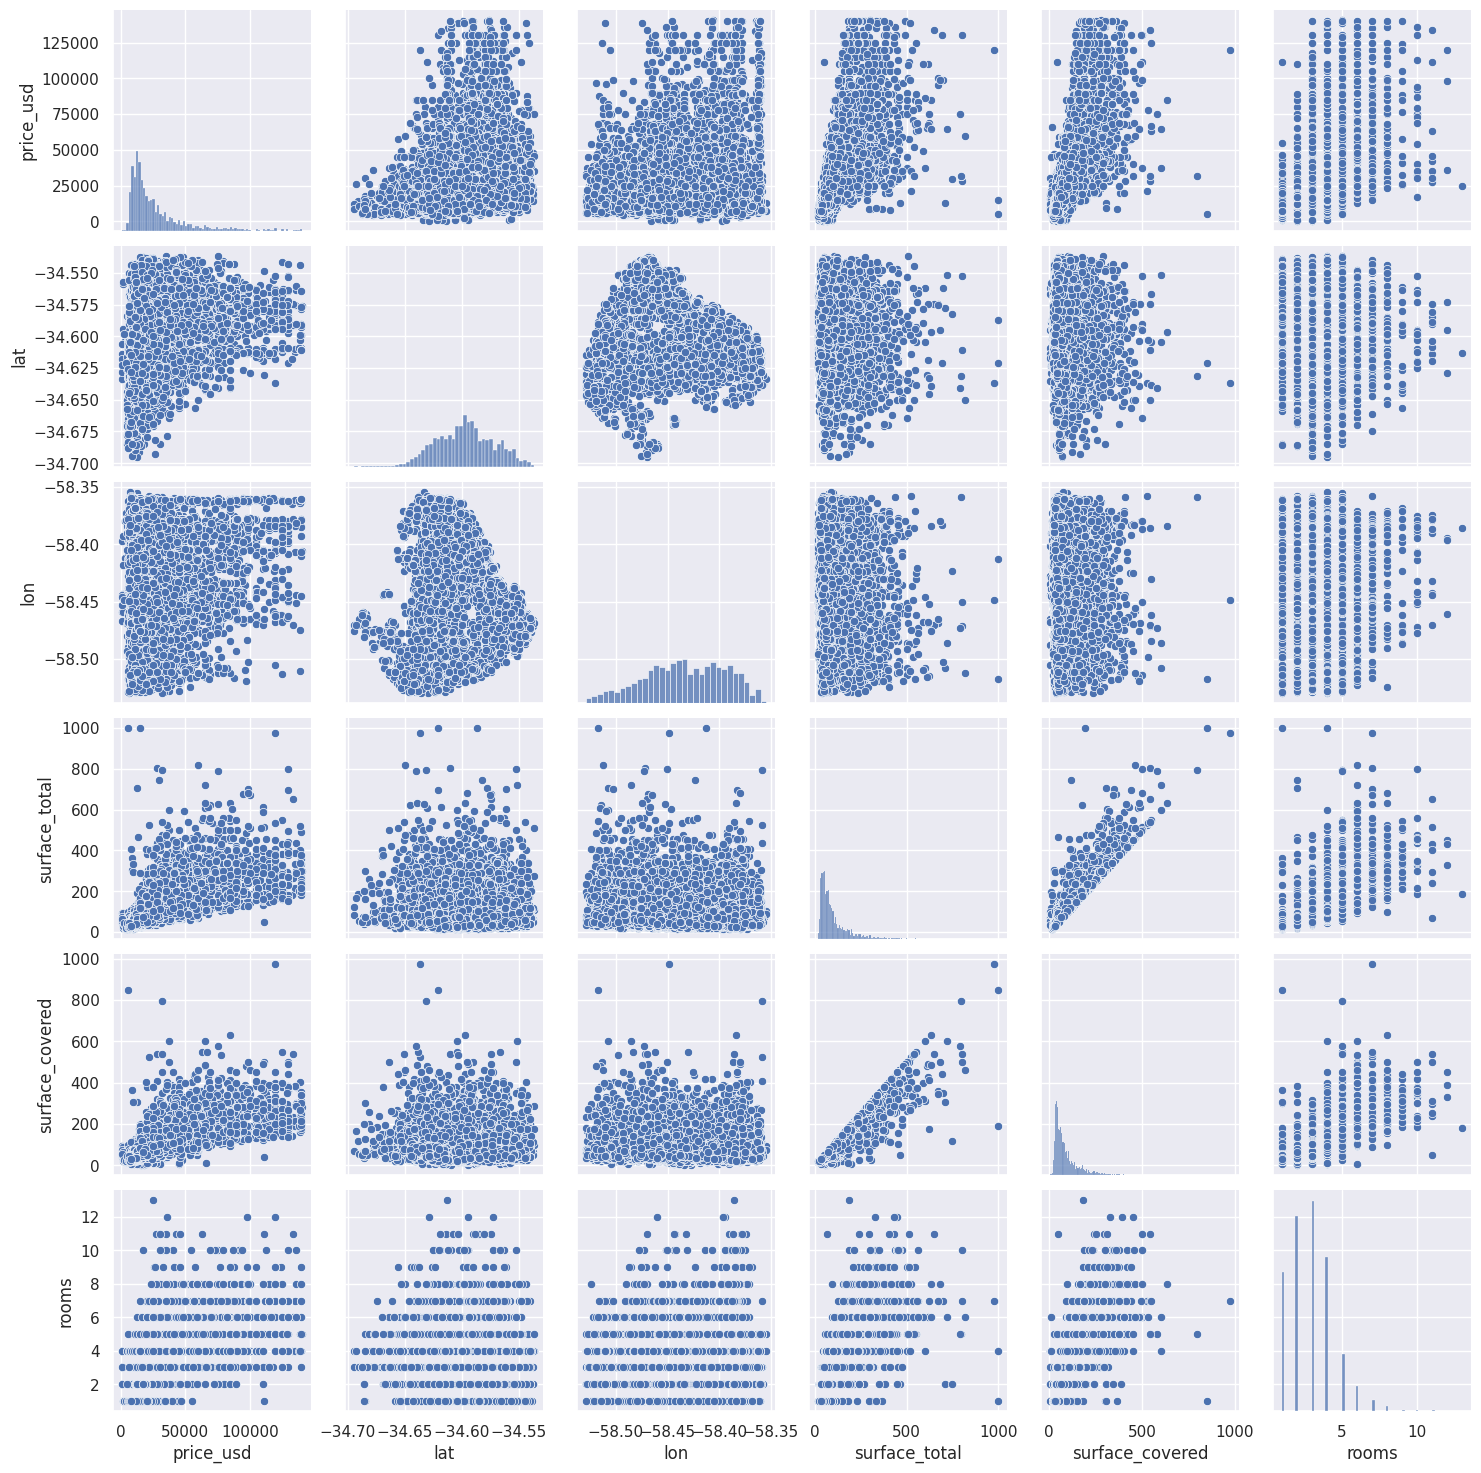

In [50]:
## Analizo la correlación para variables numéricas

sns.pairplot(df[['price_usd', 'lat', 'lon', 'surface_total','surface_covered', 'rooms']])

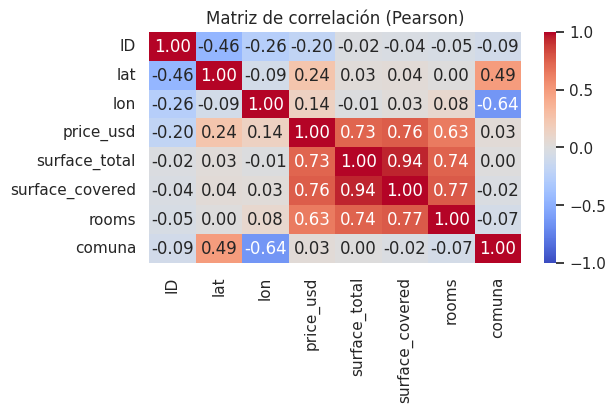

In [51]:
## Matriz de correlación

# Selecciono solo columnas numéricas y elijo método
corr = df.select_dtypes("number").corr(method="pearson")

# grafico
plt.figure(figsize=(6, 3))
sns.heatmap(
    corr,
    annot=True,          # escribe el número dentro de cada celda
    fmt=".2f",           # 2 decimales
    cmap="coolwarm",     # azul-negativo / rojo-positivo
    vmin=-1, vmax=1      # escala completa
)
plt.title("Matriz de correlación (Pearson)")
plt.show()

## Modelo Regresión Lineal

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [54]:
onehot_encoder = OneHotEncoder()

In [55]:
# Defino las variables categóricas
categorical = ['property_type','barrio','comuna']

In [56]:
# OneHotEncoder dentro de ColumnTransformer
transformador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical)
    ],
    remainder='passthrough'  # deja las otras columnas como están
)

In [58]:
X = df.drop(columns=['price_usd'])
y = df['price_usd']

In [59]:
X_encoded = transformador.fit_transform(X)
X=X_encoded

In [60]:
# # Defino Variables y objetivo

# Divido el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eligo y entreno el modelo
model = LinearRegression()
model.fit(X_train, y_train)

#Hago la predicción
y_pred = model.predict(X_test)

#Mido el modelo
r2_score(y_test, y_pred)

# RL Modelo3_r2: 0.7401369426734675-- Variables Numéricas y Categóricas

0.7395948372418991

## Modelo Decision Tree

In [61]:
#Importo la función que necesito
from sklearn.tree import DecisionTreeRegressor

In [62]:
model_dt =  DecisionTreeRegressor(random_state=42)

In [64]:
# Defino las variables categóricas
categorical = ['property_type','barrio','comuna']

# OneHotEncoder dentro de ColumnTransformer
transformador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical)
    ],
    remainder='passthrough'  # deja las otras columnas como están
)

# Defino X , y
X = df.drop(columns=['price_usd'])
X_encoded = transformador.fit_transform(X)

X = X_encoded
y = df['price_usd']

# Divido el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eligo y entreno el modelo
model_dt.fit(X_train, y_train)

#Hago la predicción
y_pred = model_dt.predict(X_test)

#Mido el modelo
r2_score(y_test, y_pred)


# RL Modelo3_r2: 0.7401369426734675-- Variables Numéricas y Categóricas

# DT Modelo1_r2: 0.7362301266045398-- Variables Numéricas y Categóricas

0.7514721204221946

## Selección de Modelo Final

En este análisis se probaron diferentes modelos: de regresión lineal y árbol de decisión.

La métrica utilizada para evaluar el desempeño de los modelos fue el coeficiente de determinación R², que mide qué tan bien las variables explican la variabilidad del precio.

Se selecciona el Modelo 4 de Regresión Lineal, que incluye variables numéricas, categóricas y la cantidad de delitos por barrio.

In [ ]:
## Elimino la columna del valor de los terrenos
df_limpio = df_limpio.drop(columns=['valorpromedio_terreno_usd_m2'])


In [ ]:
## Agrego de nuevo Cantidad de Delitos
df_limpio = df_limpio.merge(df_del_cantidad, how = 'left', on='barrio')

In [ ]:
# Defino las variables categóricas
categorical = ['property_type','barrio','comuna']

# OneHotEncoder dentro de ColumnTransformer
transformador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical)
    ],
    remainder='passthrough'  # deja las otras columnas como están
)

# Defino X , y
X = df_limpio.drop(columns=['price_usd'])
X_encoded = transformador.fit_transform(X)

X = X_encoded
y = df_limpio['price_usd']

# Divido el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eligo y entreno el modelo
model = LinearRegression()
model.fit(X_train, y_train)

#Hago la predicción
y_pred = model.predict(X_test)

#Mido el modelo
r2_score(y_test, y_pred)

In [ ]:
print('Real      : ', y_test[:5].values)
print('Prediccion: ', y_pred[:5])

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

# Línea ideal: donde y = x (predicción perfecta)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel("Precio real (USD)")
plt.ylabel("Precio predicho (USD)")
plt.title("Comparación entre precios reales y predichos")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))

sns.kdeplot(y_test, label='Real', fill=True, linewidth=2)
sns.kdeplot(y_pred, label='Predicción', fill=True, linewidth=2)

plt.title('Distribución de precios reales vs predicción')
plt.xlabel('Precio (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()